In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston

In [8]:
# DATA
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [20]:
# Data Split
from sklearn.model_selection import train_test_split

y = boston_df['PRICE']
x = boston_df.drop(['PRICE'], axis = 1, inplace = False)

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = .3, random_state = 42)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.10,0.0,0.740,6.406,97.2,2.0651,24.0,666.0,20.2,385.96,19.52
23,0.98843,0.0,8.14,0.0,0.538,5.813,100.0,4.0952,4.0,307.0,21.0,394.54,19.88
225,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63
433,5.58107,0.0,18.10,0.0,0.713,6.436,87.9,2.3158,24.0,666.0,20.2,100.19,16.22


In [21]:
##### Linear Regression
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

print('weight : ', lr_model.coef_)
print('bias : ', lr_model.intercept_)

weight :  [-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]
bias :  31.631084035692954


In [22]:
pd.Series(data = np.round(lr_model.coef_, 1), index = x.columns)

CRIM       -0.1
ZN          0.0
INDUS       0.0
CHAS        3.1
NOX       -15.4
RM          4.1
AGE        -0.0
DIS        -1.4
RAD         0.2
TAX        -0.0
PTRATIO    -0.9
B           0.0
LSTAT      -0.5
dtype: float64

In [23]:
# 모델 평가
from sklearn.metrics import mean_squared_error, r2_score

y_preds = lr_model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)

print('MSE : {0:.3f}, RMSE : {1:.3f}, r2 : {2:.3f}'.format(mse, rmse, r2) )

MSE : 21.517, RMSE : 4.639, r2 : 0.711


In [25]:
result = pd.DataFrame({'y' : y_test.values, 'y_pred' : y_preds, 'diff' : np.abs(y_test.values - y_preds)})
result.sort_values(by = ['diff'], ascending = False)

,y,y_pred,diff
96,50.0,24.822491,25.177509
97,17.9,-0.477121,18.377121
12,7.0,-6.865435,13.865435
94,27.5,14.032417,13.467583
32,15.0,25.313725,10.313725
...,...,...,...
72,10.8,10.943170,0.143170
62,31.5,31.635220,0.135220
139,15.6,15.466213,0.133787
7,14.0,14.078599,0.078599


<AxesSubplot:>

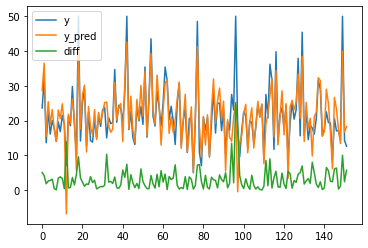

In [26]:
result.plot()